In [2]:
%pylab inline

import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Populating the interactive namespace from numpy and matplotlib


In [3]:
puntos=50
X=zeros([puntos,puntos])
Y=zeros([puntos,puntos])
x=linspace(-5,5,puntos)
y=linspace(-5,5,puntos)

for i in range(len(X[:,0])):
    
    for j in range(len(Y[:,0])):
        X[i][j]=x[i]
        Y[i][j]=y[j]


In [5]:

xazul=zeros(100)
yazul=zeros(100)
xnaranja=zeros(100)
ynaranja=zeros(100)
for i in range(len(xazul)):
    xazul[i]=normal(1,1)
    yazul[i]=normal(0,1)
    xnaranja[i]=normal(0,1)
    ynaranja[i]=normal(1,1)

(-4, 4)

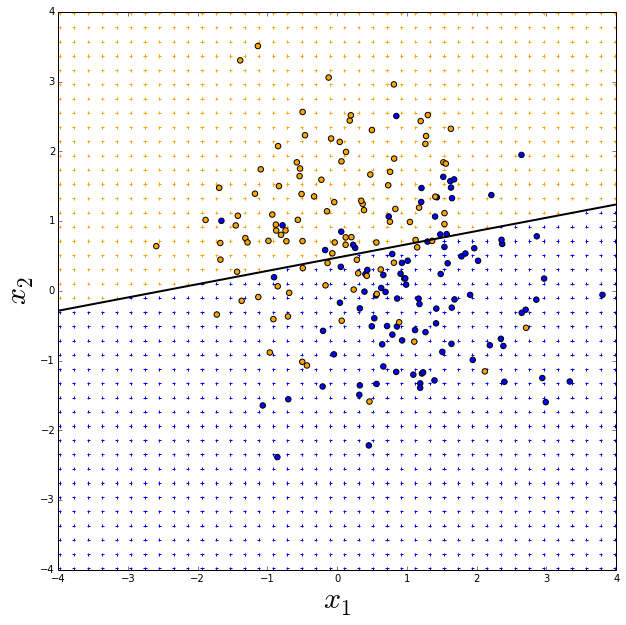

In [6]:

X01=zeros([2*len(xazul),2])
Y01=zeros(2*len(xazul))


for i in range(len(xazul)):
    
    X01[2*i][0]=xazul[i]
    X01[2*i][1]=yazul[i]  
    Y01[2*i]=1
    X01[2*i+1][0]=xnaranja[i]
    X01[2*i+1][1]=ynaranja[i]  
    Y01[2*i+1]=0

    linreg = LinearRegression()
linreg.fit(X01, Y01)


a=linspace(-5,5,1000)
b=a*linreg.coef_[0]+linreg.intercept_
c=a*linreg.coef_[1]+linreg.intercept_
figsize(10,10)

for i in range(len(X[:,0])):
    for j in range(len(X[0,:])):
        
        if(Y[i][j]<X[i][j]*linreg.coef_[0]+linreg.intercept_):
            scatter(X[i][j],Y[i][j],s=10,c="b",marker="+")
        else:
            scatter(X[i][j],Y[i][j],s=10,c="orange",marker="+")


plot(a,b,c="black",linewidth=2)
scatter(xazul,yazul,c='b',marker="o",s=30)
scatter(xnaranja,ynaranja,c='orange',marker="o",s=30)


ylabel("$ x_{2}\ $",size=30)
xlabel("$ x_{1}\ $",size=30)
xlim(-4,4)
ylim(-4,4)



In [7]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [8]:
X=zeros([2*len(xazul),2])
y=zeros(2*len(xazul))
for i in range(len(xazul)):
    
    X[2*i][0]=xazul[i]
    X[2*i][1]=yazul[i]  
    y[2*i]=1
    X[2*i+1][0]=xnaranja[i]
    X[2*i+1][1]=ynaranja[i]  
    y[2*i+1]=0

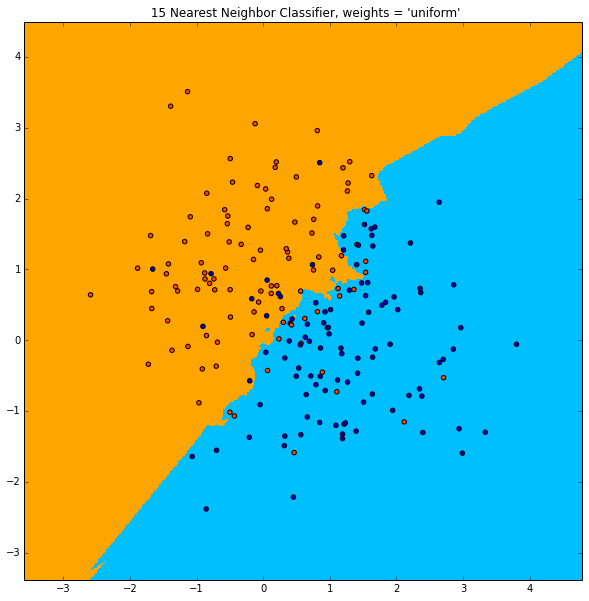

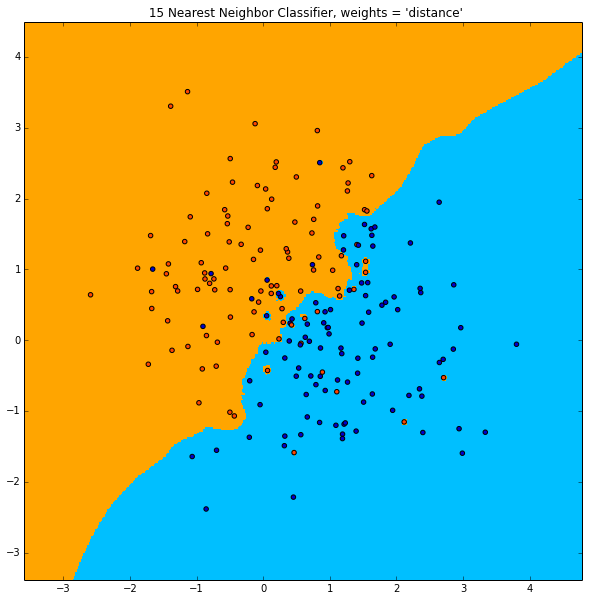

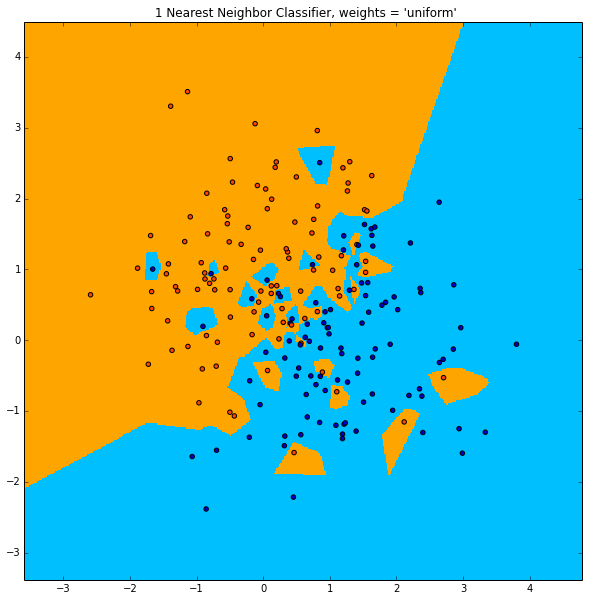

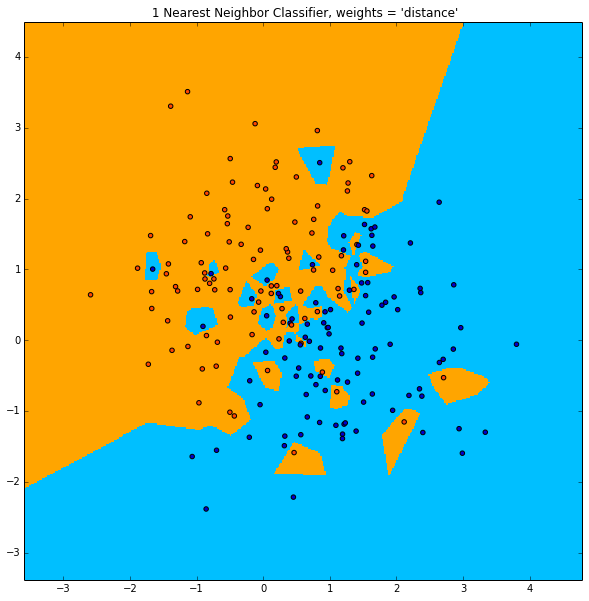

In [9]:
vecinos=[15,1]
h=0.02
# Create color maps
cmap_light = ListedColormap(['#ffa500', '#0000ff', '#00BFFF'])
cmap_bold = ListedColormap(['#FF4500', '#0000ff', '#0000CD'])
for i in range(len(vecinos)):
    n_neighbors =vecinos[i]
    
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        g=clf.fit(X, y)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
   
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(" %i Nearest Neighbor Classifier, weights = '%s'"
                  % (n_neighbors, weights))
plt.show()


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in

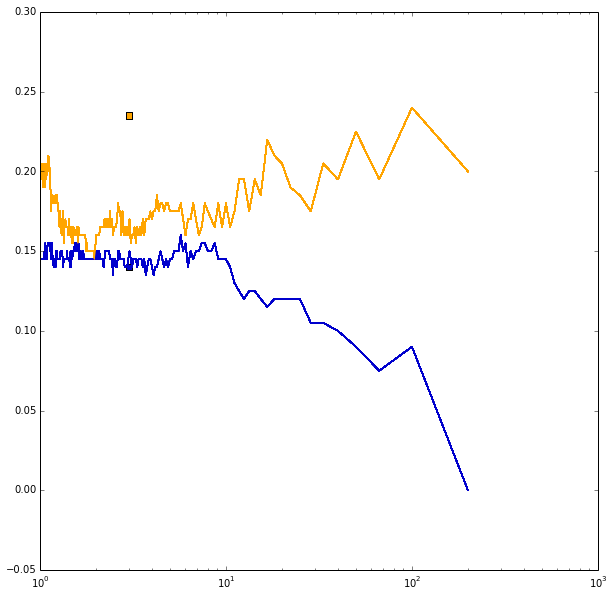

In [10]:
centazul=[]
centnaranja=[]
for j in range(10):
    centazul.append(np.random.multivariate_normal([1,0],[[1,0],[0,1]]))
    centnaranja.append(np.random.multivariate_normal([0,1],[[1,0],[0,1]]))
xazul=[]
yazul=[]
xnaranja=[]
ynaranja=[]
z=[]
puntos=[]
for i in range(100):
    az=np.random.randint(9,size=1)
    na=np.random.randint(9,size=1)
    pazul=np.random.multivariate_normal(centazul[az],[[0.2,0],[0,0.2]])
    puntos.append([pazul[1],pazul[0]])
    pnaranja=np.random.multivariate_normal(centnaranja[na],[[0.2,0],[0,0.2]])
    puntos.append([pnaranja[1],pnaranja[0]])
    xazul.append(pazul[0])
    yazul.append(pazul[1])
    z.append(0)
    xnaranja.append(pnaranja[0])
    ynaranja.append(pnaranja[1])
    z.append(1)

puntos_train=[]
z_train=[]
puntos_test=[]
z_test=[]
for i in range(200):
    az=np.random.randint(9,size=1)
    na=np.random.randint(9,size=1)
    pazul=np.random.multivariate_normal(centazul[az],[[0.2,0],[0,0.2]])
    puntos_train.append([pazul[1], pazul[0]])
    z_train.append(0)
    pnaranja=np.random.multivariate_normal(centnaranja[na],[[0.2,0],[0,0.2]])
    puntos_train.append([pnaranja[1],pnaranja[0]])
    z_train.append(1)
for i in range(200):
    az=np.random.randint(9,size=1)
    na=np.random.randint(9,size=1)
    pazul=np.random.multivariate_normal(centazul[az],[[0.2,0],[0,0.2]])
    puntos_test.append([pazul[1],pazul[0]])
    z_test.append(0)
    pnaranja=np.random.multivariate_normal(centnaranja[na],[[0.2,0],[0,0.2]])
    puntos_test.append([pnaranja[1],pnaranja[0]])    
    z_test.append(1)
error_train=[]
error_test=[]
k=[]
cf=[]

for i in range(200):
    cf.append(neighbors.KNeighborsClassifier(n_neighbors=i+1))
    
for i in range(200):
    k.append(float(200)/(i+1))
    cf[i].fit(puntos_train, z_train)
    errort=0
    errore=0
    pr_train=cf[i].predict(puntos_train)
    pr_test=cf[i].predict(puntos_test)
    for j in range(200):
        if pr_train[j]!=z_train[j]:
           errore+=1
        if pr_test[j]!=z_test[j]:
           errort+=1
    error_train.append(float(errore)/200)
    error_test.append(float(errort)/200)     
clf3=linear_model.LinearRegression()
clf3.fit(puntos_train,z_train)
pr_trainl=clf3.predict(puntos_train)
pr_testl=clf3.predict(puntos_test)
errorel=0
errortl=0

for j in range(200):
    pr_trainl1=0
    pr_testl1=0
    if pr_trainl[j]>0.5:
       pr_trainl1=1
    if pr_testl[j]>0.5:
       pr_testl1=1
    if pr_trainl1!=z_train[j]:
       errorel+=1
    if pr_testl1!=z_test[j]:
       errortl+=1
errorel=float(errorel)/200
errortl=float(errortl)/200

k1=[]
error_train1=[]
error_test1=[]
for i in range(200):
    k1.append(k[199-i])
    error_train1.append(error_train[199-i])
    error_test1.append(error_test[199-i])

    plot(k,error_train,c='#0000CD')
    plot(k,error_test,c='#ffa500')
    scatter(3,errorel,s=40,c='#0000CD',marker='s')
    scatter(3,errortl,s=40,c='#ffa500',marker='s')
    xscale('log')
plt.show()




